# Exercise 5

In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku
import numpy as np

In [2]:
tokenizer = Tokenizer()
data = open('sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

1. Create the LSTM model

In [3]:
model = Sequential()
model.add(Embedding(total_words, 256, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(800, return_sequences=True)))
model.add(Dropout(0.10))
model.add(Bidirectional(LSTM(800)))
model.add(Dense(256, kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)))
model.add(Dense(total_words, activation='softmax'))

# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 256)           864000    
                                                                 
 bidirectional (Bidirection  (None, 10, 1500)          6042000   
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 10, 1500)          0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 1500)              13506000  
 onal)                                                           
                                                                 
 dense (Dense)               (None, 256)               384256    
                                                                 
 dense_1 (Dense)             (None, 3375)              8

In [4]:
 history = model.fit(predictors, label, epochs=30, verbose=1)

Epoch 1/30
484/484 [==============================] - 31s 39ms/step - loss: 6.9750 - accuracy: 0.0222
Epoch 2/30
484/484 [==============================] - 16s 33ms/step - loss: 6.4633 - accuracy: 0.0347
Epoch 3/30
484/484 [==============================] - 16s 32ms/step - loss: 6.1584 - accuracy: 0.0488
Epoch 4/30
484/484 [==============================] - 15s 32ms/step - loss: 5.8572 - accuracy: 0.0622
Epoch 5/30
484/484 [==============================] - 15s 32ms/step - loss: 5.5430 - accuracy: 0.0792
Epoch 6/30
484/484 [==============================] - 15s 31ms/step - loss: 5.2126 - accuracy: 0.0942
Epoch 7/30
484/484 [==============================] - 15s 31ms/step - loss: 4.8470 - accuracy: 0.1151
Epoch 8/30
484/484 [==============================] - 15s 32ms/step - loss: 4.4328 - accuracy: 0.1454
Epoch 9/30
484/484 [==============================] - 15s 31ms/step - loss: 3.9596 - accuracy: 0.2003
Epoch 10/30
484/484 [==============================] - 15s 31ms/step - loss: 3.427

In [7]:
 history1 = model.fit(predictors, label, epochs=5, verbose=1)

Epoch 1/5
484/484 [==============================] - 15s 31ms/step - loss: 0.7723 - accuracy: 0.8454
Epoch 2/5
484/484 [==============================] - 15s 32ms/step - loss: 0.7504 - accuracy: 0.8469
Epoch 3/5
484/484 [==============================] - 16s 32ms/step - loss: 0.7309 - accuracy: 0.8467
Epoch 4/5
484/484 [==============================] - 15s 31ms/step - loss: 0.7237 - accuracy: 0.8474
Epoch 5/5
484/484 [==============================] - 15s 31ms/step - loss: 0.7172 - accuracy: 0.8460


In [8]:
 history2 = model.fit(predictors, label, epochs=30, verbose=1)

Epoch 1/30
484/484 [==============================] - 15s 31ms/step - loss: 0.7214 - accuracy: 0.8466
Epoch 2/30
484/484 [==============================] - 15s 32ms/step - loss: 0.7592 - accuracy: 0.8395
Epoch 3/30
484/484 [==============================] - 16s 32ms/step - loss: 0.8843 - accuracy: 0.8116
Epoch 4/30
484/484 [==============================] - 15s 31ms/step - loss: 0.8703 - accuracy: 0.8126
Epoch 5/30
484/484 [==============================] - 15s 31ms/step - loss: 0.7626 - accuracy: 0.8407
Epoch 6/30
484/484 [==============================] - 15s 32ms/step - loss: 0.7154 - accuracy: 0.8467
Epoch 7/30
484/484 [==============================] - 15s 32ms/step - loss: 0.6933 - accuracy: 0.8484
Epoch 8/30
484/484 [==============================] - 15s 31ms/step - loss: 0.6797 - accuracy: 0.8489
Epoch 9/30
484/484 [==============================] - 15s 31ms/step - loss: 0.6680 - accuracy: 0.8497
Epoch 10/30
484/484 [==============================] - 15s 31ms/step - loss: 0.664

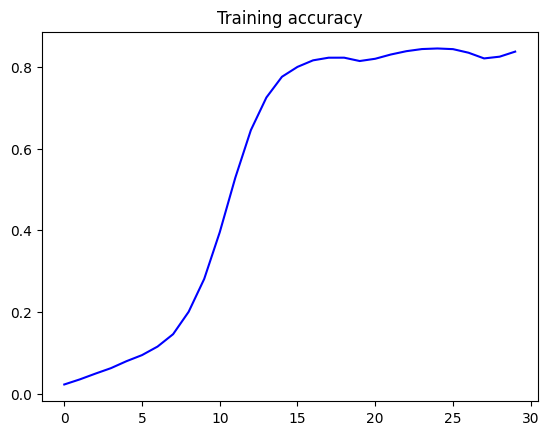

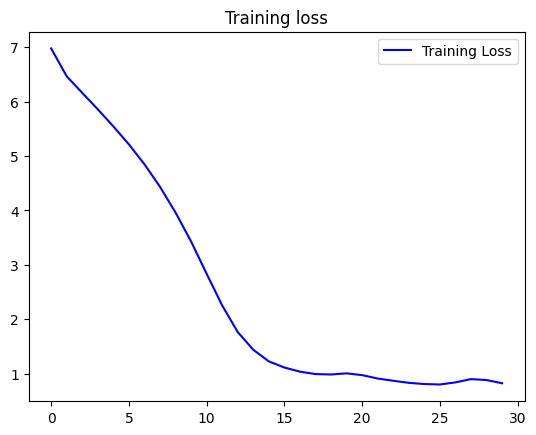

In [5]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [6]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 175ms/step


KeyboardInterrupt: 